<a href="https://colab.research.google.com/github/ChristeenTJose/Recognition-of-rarest-butterfly---Palos-Verdes-Blue/blob/master/Fine_tuning_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine tuning models

*   Mount drive
*   Build the directories for ImageDataGenerator 



## Install Tensorflow 2.0

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1

     |████████████████████████████████| 348.9MB 49kB/s 
     |████████████████████████████████| 3.1MB 39.6MB/s 
     |████████████████████████████████| 501kB 43.5MB/s 
  Found existing installation: tensorflow-gpu 1.14.0
    Uninstalling tensorflow-gpu-1.14.0:
      Successfully uninstalled tensorflow-gpu-1.14.0


**You must restart the runtime in order to use newly installed versions.**

## Import required libraries

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

## Model 0: Handbuilt keras model


### Build the model

In [0]:
model_000= models.Sequential()
model_000.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model_000.add(layers.MaxPooling2D((2,2)))
model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_000.add(layers.MaxPooling2D((2,2)))
model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_000.add(layers.MaxPooling2D((2,2)))
model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_000.add(layers.MaxPooling2D((2,2)))
model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_000.add(layers.MaxPooling2D((2,2)))
model_000.add(layers.Flatten())
model_000.add(layers.Dropout(0.25))
model_000.add(layers.Dense(256, activation='relu'))
model_000.add(layers.Dropout(0.3))
model_000.add(layers.Dense(11, activation='softmax'))
model_000.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)       

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_000.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_000.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
144/144 [==============================] - 26s 183ms/step - loss: 2.3865 - accuracy: 0.1198 - val_loss: 2.3560 - val_accuracy: 0.1543
Epoch 2/150
144/144 [==============================] - 21s 148ms/step - loss: 2.3485 - accuracy: 0.1421 - val_loss: 2.2692 - val_accuracy: 0.2716
Epoch 3/150
144/144 [==============================] - 21s 149ms/step - loss: 2.2489 - accuracy: 0.1922 - val_loss: 2.1404 - val_accuracy: 0.2531
Epoch 4/150
144/144 [==============================] - 21s 149ms/step - loss: 2.0769 - accuracy: 0.2688 - val_loss: 2.0105 - val_accuracy: 0.2654
Epoch 5/150
144/144 [==============================] - 21s 148ms/step - loss: 1.9040 - accuracy: 0.3022 - val_loss: 2.2055 - val_accuracy: 0.2160
Epoch 6/150
144/144 [==============================] - 21s 148ms/step - loss: 1.8201 - accuracy: 0.3542 - val_loss: 1.5669 - val_accuracy: 0.4691
Epoch 7/150
144/144 [==============================] - 21s 149ms/step - loss: 1.7991 - accuracy: 0.3464 - val_loss: 1.5002 -

### Performance of the model

In [0]:
History = model_000.history

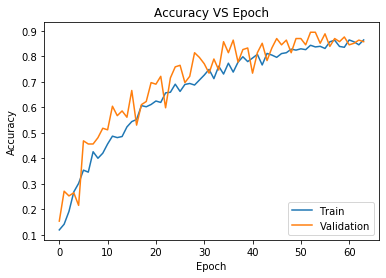

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

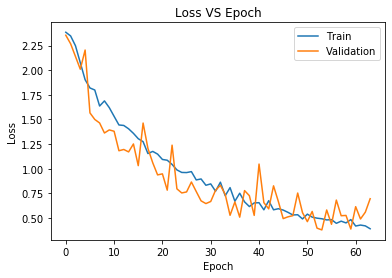

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_000.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 7ms/sample - loss: 0.1137 - accuracy: 0.9474
Test Loss: 0.11372270435094833
Test Accuracy: 0.94736844


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_000.save('Model 000.h5')


### Save metrics

In [0]:
with open('history 000.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 000.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 1: VGG16 (Transfer Learning)


### Build the model

In [0]:
Model=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_001=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_001.add(i)
model_001.add(layers.Flatten())
model_001.add(layers.Dense(units=11, activation='softmax'))
model_001.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_001.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_001.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
144/144 [==============================] - 325s 2s/step - loss: 2.2103 - accuracy: 0.2646 - val_loss: 1.8159 - val_accuracy: 0.5247
Epoch 2/150
144/144 [==============================] - 28s 196ms/step - loss: 1.6488 - accuracy: 0.5446 - val_loss: 1.4100 - val_accuracy: 0.6790
Epoch 3/150
144/144 [==============================] - 28s 194ms/step - loss: 1.2964 - accuracy: 0.6741 - val_loss: 1.1550 - val_accuracy: 0.7222
Epoch 4/150
144/144 [==============================] - 28s 192ms/step - loss: 1.0526 - accuracy: 0.7479 - val_loss: 1.0152 - val_accuracy: 0.7531
Epoch 5/150
144/144 [==============================] - 28s 192ms/step - loss: 0.9435 - accuracy: 0.7744 - val_loss: 0.8902 - val_accuracy: 0.7778
Epoch 6/150
144/144 [==============================] - 27s 185ms/step - loss: 0.7934 - accuracy: 0.8222 - val_loss: 0.8490 - val_accuracy: 0.7469
Epoch 7/150
144/144 [==============================] - 27s 186ms/step - loss: 0.7097 - accuracy: 0.8184 - val_loss: 0.7414 - v

### Performance of the model

In [0]:
History = model_001.history

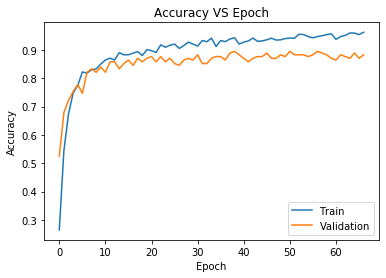

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

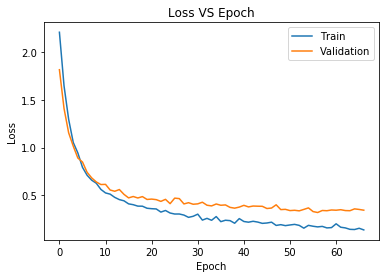

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_001.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 1s 67ms/sample - loss: 0.1158 - accuracy: 1.0000
Test Loss: 0.11577478051185608
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_001.save('Model 001.h5')


### Save metrics

In [0]:
with open('history 001.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 001.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 2: VGG19 (Transfer Learning)


### Build the model

In [0]:
Model=tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_002=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_002.add(i)
model_002.add(layers.Flatten())
model_002.add(layers.Dense(units=11, activation='softmax'))
model_002.summary()

80142336/80134624 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_002.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_002.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 898s 6s/step - loss: 2.2225 - accuracy: 0.2409 - val_loss: 1.8803 - val_accuracy: 0.3827
Epoch 2/150
144/144 [==============================] - 22s 151ms/step - loss: 1.7111 - accuracy: 0.5223 - val_loss: 1.5164 - val_accuracy: 0.5617
Epoch 3/150
144/144 [==============================] - 22s 151ms/step - loss: 1.4162 - accuracy: 0.6240 - val_loss: 1.3077 - val_accuracy: 0.6358
Epoch 4/150
144/144 [==============================] - 22s 150ms/step - loss: 1.1975 - accuracy: 0.7075 - val_loss: 1.1676 - val_accuracy: 0.6728
Epoch 5/150
144/144 [==============================] - 21s 148ms/step - loss: 1.0376 - accuracy: 0.7375 - val_loss: 1.0424 - val_accuracy: 0.6790
Epoch 6/150
144/144 [==============================] - 21s 149ms/step - loss: 0.8992 - accuracy: 0.7869 - val_loss: 0.9452 - val_accuracy: 0.7222
Epoch 7/150
144/144 [===========

### Performance of the model

In [0]:
History = model_002.history

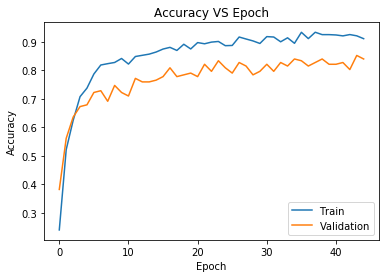

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

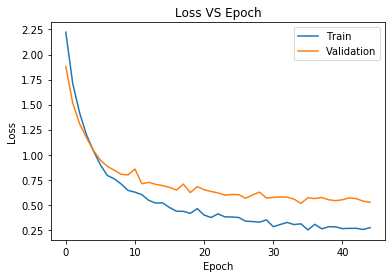

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_002.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 18ms/sample - loss: 0.3457 - accuracy: 0.8421
Test Loss: 0.34571143984794617
Test Accuracy: 0.84210527


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_002.save('Model 002.h5')


### Save metrics

In [0]:
with open('history 002.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 002.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 3: MobileNet (Transfer Learning)


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_003=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_003.add(i)
model_003.add(layers.Flatten())
model_003.add(layers.Dense(units=11, activation='softmax'))
model_003.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)       

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_003.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_003.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
144/144 [==============================] - 530s 4s/step - loss: 2.3208 - accuracy: 0.3733 - val_loss: 0.6281 - val_accuracy: 0.8333
Epoch 2/150
144/144 [==============================] - 22s 154ms/step - loss: 0.8957 - accuracy: 0.7298 - val_loss: 0.3513 - val_accuracy: 0.9136
Epoch 3/150
144/144 [==============================] - 22s 152ms/step - loss: 0.6076 - accuracy: 0.8148 - val_loss: 0.2362 - val_accuracy: 0.9259
Epoch 4/150
144/144 [==============================] - 22s 153ms/step - loss: 0.4809 - accuracy: 0.8593 - val_loss: 0.2832 - val_accuracy: 0.9568
Epoch 5/150
144/144 [==============================] - 22s 152ms/step - loss: 0.4284 - accuracy: 0.8747 - val_loss: 0.2325 - val_accuracy: 0.9568
Epoch 6/150
144/144 [==============================] - 22s 151ms/step - loss: 0.3128 - accuracy: 0.9011 - val_loss: 0.2001 - val_accuracy: 0.9691
Epoch 7/150
144/144 [==============================] - 22s 151ms/step - loss: 0.3203 - accuracy: 0.9039 - val_loss: 0.1761 - v

### Performance of the model

In [0]:
History = model_003.history

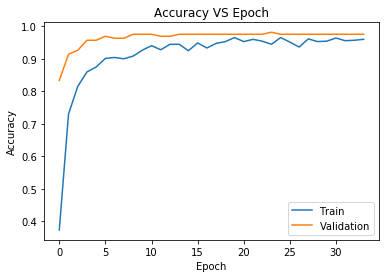

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

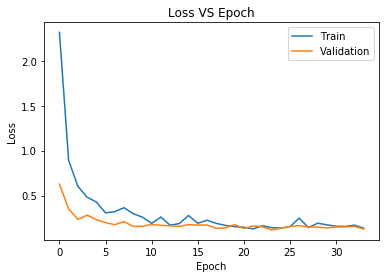

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_003.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 1s 34ms/sample - loss: 0.0012 - accuracy: 1.0000
Test Loss: 0.0012161595514044166
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_003.save('Model 003.h5')


### Save metrics

In [0]:
with open('history 003.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 003.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 4: MobileNet (FINE TUNING 1 layer) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_004=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_004.add(i)
n=len(model_004.layers)
model_004.layers[n-2].trainable=True#last layer is Relu
model_004.add(layers.Flatten())
model_004.add(layers.Dense(units=11, activation='softmax'))
model_004.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)       

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_004.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_004.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
144/144 [==============================] - 22s 152ms/step - loss: 2.2047 - accuracy: 0.4415 - val_loss: 0.5091 - val_accuracy: 0.8333
Epoch 2/150
144/144 [==============================] - 19s 130ms/step - loss: 0.8602 - accuracy: 0.7284 - val_loss: 0.2424 - val_accuracy: 0.9321
Epoch 3/150
144/144 [==============================] - 19s 130ms/step - loss: 0.6273 - accuracy: 0.8008 - val_loss: 0.1644 - val_accuracy: 0.9444
Epoch 4/150
144/144 [==============================] - 19s 129ms/step - loss: 0.5262 - accuracy: 0.8384 - val_loss: 0.1400 - val_accuracy: 0.9691
Epoch 5/150
144/144 [==============================] - 19s 129ms/step - loss: 0.3654 - accuracy: 0.8861 - val_loss: 0.1224 - val_accuracy: 0.9691
Epoch 6/150
144/144 [==============================] - 19s 130ms/step - loss: 0.3544 - accuracy: 0.8939 - val_loss: 0.1311 - val_accuracy: 0.9630
Epoch 7/150
144/144 [==============================] - 19s 133ms/step - loss: 0.3294 - accuracy: 0.9095 - val_loss: 0.1228 -

### Performance of the model

In [0]:
History = model_004.history

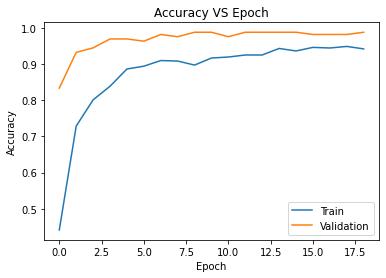

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

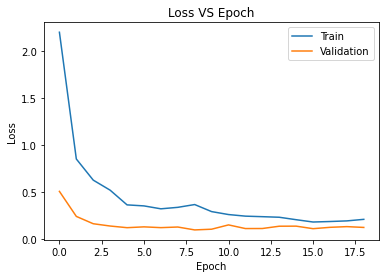

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_004.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 21ms/sample - loss: 0.0332 - accuracy: 1.0000
Test Loss: 0.033174652606248856
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_004.save('Model 004.h5')

### Save metrics

In [0]:
with open('history 004.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 004.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 5: MobileNet (FINE TUNING 2 layers) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_005=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_005.add(i)
n=len(model_005.layers)
model_005.layers[n-2].trainable=True#last layer is Relu
model_005.layers[n-3].trainable=True
model_005.add(layers.Flatten())
model_005.add(layers.Dense(units=11, activation='softmax'))
model_005.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_005.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_005.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 24s 165ms/step - loss: 1.7660 - accuracy: 0.5139 - val_loss: 0.3658 - val_accuracy: 0.8889
Epoch 2/150
144/144 [==============================] - 20s 137ms/step - loss: 0.6363 - accuracy: 0.7911 - val_loss: 0.2385 - val_accuracy: 0.9198
Epoch 3/150
144/144 [==============================] - 20s 136ms/step - loss: 0.4759 - accuracy: 0.8552 - val_loss: 0.1564 - val_accuracy: 0.9691
Epoch 4/150
144/144 [==============================] - 20s 136ms/step - loss: 0.4090 - accuracy: 0.8677 - val_loss: 0.1502 - val_accuracy: 0.9630
Epoch 5/150
144/144 [==============================] - 19s 134ms/step - loss: 0.3843 - accuracy: 0.8955 - val_loss: 0.1457 - val_accuracy: 0.9691
Epoch 6/150
144/144 [==============================] - 19s 135ms/step - loss: 0.2738 - accuracy: 0.9067 - val_loss: 0.1232 - val_accuracy: 0.9877
Epoch 7/150
144/144 [=========

### Performance of the model

In [0]:
History = model_005.history

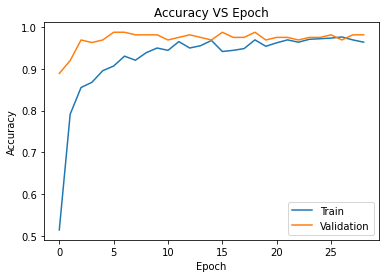

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

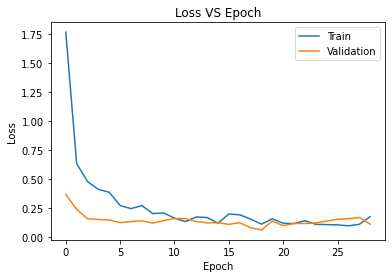

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_005.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 22ms/sample - loss: 3.2102e-05 - accuracy: 1.0000
Test Loss: 3.210178329027258e-05
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_005.save('Model 005.h5')

### Save metrics

In [0]:
with open('history 005.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 005.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 6: MobileNet (FINE TUNING 3 layers) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_006=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_006.add(i)
n=len(model_006.layers)
model_006.layers[n-2].trainable=True#last layer is ReLu
model_006.layers[n-3].trainable=True
model_006.layers[n-5].trainable=True#layer 4 is ReLu
model_006.add(layers.Flatten())
model_006.add(layers.Dense(units=11, activation='softmax'))
model_006.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)       

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_006.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_006.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 24s 165ms/step - loss: 1.7666 - accuracy: 0.4986 - val_loss: 0.3054 - val_accuracy: 0.9074
Epoch 2/150
144/144 [==============================] - 19s 132ms/step - loss: 0.6355 - accuracy: 0.8162 - val_loss: 0.2185 - val_accuracy: 0.9383
Epoch 3/150
144/144 [==============================] - 19s 133ms/step - loss: 0.5178 - accuracy: 0.8496 - val_loss: 0.2118 - val_accuracy: 0.9444
Epoch 4/150
144/144 [==============================] - 19s 133ms/step - loss: 0.2897 - accuracy: 0.9081 - val_loss: 0.1503 - val_accuracy: 0.9630
Epoch 5/150
144/144 [==============================] - 19s 132ms/step - loss: 0.3254 - accuracy: 0.9081 - val_loss: 0.1673 - val_accuracy: 0.9630
Epoch 6/150
144/144 [==============================] - 19s 131ms/step - loss: 0.3840 - accuracy: 0.8983 - val_loss: 0.1555 - val_accuracy: 0.9630
Epoch 7/150
144/144 [=========

### Performance of the model

In [0]:
History = model_006.history

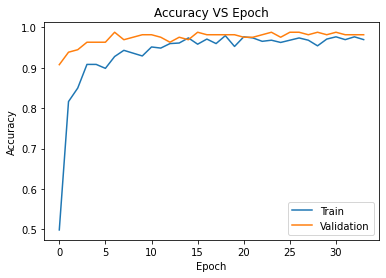

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

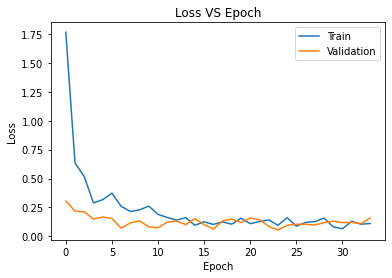

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_006.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 492us/sample - loss: 1.1294e-06 - accuracy: 1.0000
Test Loss: 1.1293561783531914e-06
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_006.save('Model 006.h5')

### Save metrics

In [0]:
with open('history 006.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 006.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 7: MobileNet (FINE TUNING 4 layers) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_007=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_007.add(i)
n=len(model_007.layers)
model_007.layers[n-2].trainable=True#last layer is ReLu
model_007.layers[n-3].trainable=True
model_007.layers[n-5].trainable=True#layer 4 is ReLu
model_007.layers[n-6].trainable=True
model_007.add(layers.Flatten())
model_007.add(layers.Dense(units=11, activation='softmax'))
model_007.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_007.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_007.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 646s 4s/step - loss: 1.8677 - accuracy: 0.4875 - val_loss: 0.4202 - val_accuracy: 0.8580
Epoch 2/150
144/144 [==============================] - 20s 137ms/step - loss: 0.6625 - accuracy: 0.8022 - val_loss: 0.2275 - val_accuracy: 0.9321
Epoch 3/150
144/144 [==============================] - 19s 133ms/step - loss: 0.4430 - accuracy: 0.8733 - val_loss: 0.1418 - val_accuracy: 0.9753
Epoch 4/150
144/144 [==============================] - 19s 133ms/step - loss: 0.3539 - accuracy: 0.8774 - val_loss: 0.1459 - val_accuracy: 0.9691
Epoch 5/150
144/144 [==============================] - 19s 133ms/step - loss: 0.2833 - accuracy: 0.9164 - val_loss: 0.1157 - val_accuracy: 0.9691
Epoch 6/150
144/144 [==============================] - 19s 135ms/step - loss: 0.2553 - accuracy: 0.9220 - val_loss: 0.0930 - val_accuracy: 0.9691
Epoch 7/150
144/144 [===========

### Performance of the model

In [0]:
History = model_007.history

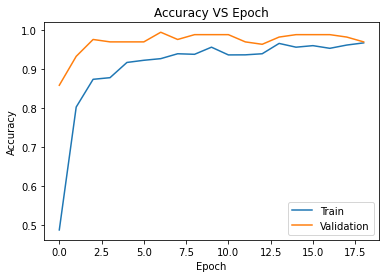

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

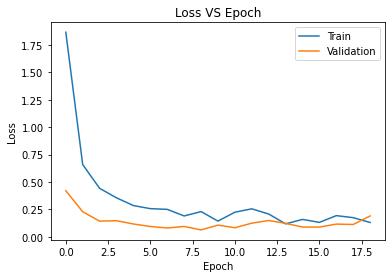

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_007.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 1s 31ms/sample - loss: 5.6840e-05 - accuracy: 1.0000
Test Loss: 5.684042480424978e-05
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_007.save('Model 007.h5')

### Save metrics

In [0]:
with open('history 007.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 007.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 8: MobileNet (FINE TUNING 5 layers) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_008=models.Sequential()
for i in Model.layers:
  i.trainable=False
  model_008.add(i)
n=len(model_008.layers)
model_008.layers[n-2].trainable=True#last layer is ReLu
model_008.layers[n-3].trainable=True
model_008.layers[n-5].trainable=True#layer 4 is ReLu
model_008.layers[n-6].trainable=True
model_008.layers[n-8].trainable=True#layer 7 is ReLu
model_008.add(layers.Flatten())
model_008.add(layers.Dense(units=11, activation='softmax'))
model_008.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)        0

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_008.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_008.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 30s 207ms/step - loss: 1.7883 - accuracy: 0.5139 - val_loss: 0.4102 - val_accuracy: 0.8519
Epoch 2/150
144/144 [==============================] - 23s 163ms/step - loss: 0.6366 - accuracy: 0.8083 - val_loss: 0.1289 - val_accuracy: 0.9506
Epoch 3/150
144/144 [==============================] - 23s 160ms/step - loss: 0.4045 - accuracy: 0.8729 - val_loss: 0.1258 - val_accuracy: 0.9753
Epoch 4/150
144/144 [==============================] - 23s 162ms/step - loss: 0.4480 - accuracy: 0.8607 - val_loss: 0.0292 - val_accuracy: 0.9938
Epoch 5/150
144/144 [==============================] - 23s 162ms/step - loss: 0.2533 - accuracy: 0.9248 - val_loss: 0.0771 - val_accuracy: 0.9877
Epoch 6/150
144/144 [==============================] - 23s 159ms/step - loss: 0.2699 - accuracy: 0.9359 - val_loss: 0.0572 - val_accuracy: 0.9815
Epoch 7/150
144/144 [=========

### Performance of the model

In [0]:
History = model_008.history

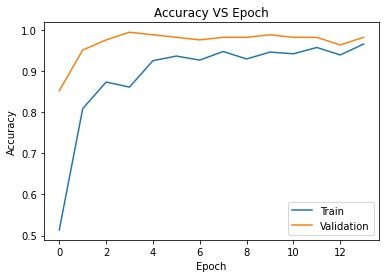

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

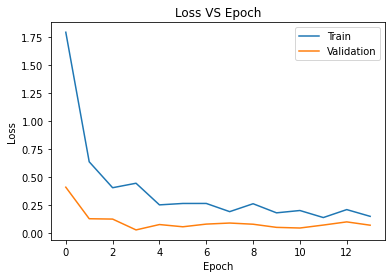

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_008.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 1s 38ms/sample - loss: 0.0016 - accuracy: 1.0000
Test Loss: 0.0015983511693775654
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_008.save('Model 008.h5')

### Save metrics

In [0]:
with open('history 008.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 008.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Model 9: MobileNet (FINE TUNING) 


### Build the model

In [0]:
Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
model_009=models.Sequential()
for i in Model.layers:
  model_009.add(i)
for i in range(len(model_009.layers)):
  model_009.layers[i].trainable=True
model_009.add(layers.Flatten())
model_009.add(layers.Dense(units=11, activation='softmax'))
model_009.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32)       

### Callbacks

In [0]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

### Compile the model

In [0]:
model_009.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

### Train the model


Declare batch size

In [0]:
Batch_Size_Train=5
Batch_Size_Valid=2

Determine training set size

In [0]:
Train_Path='/content/drive/My Drive/Project/NewDataset/train'
Train_Size=0
for i in os.listdir(Train_Path):
  Train_Size+=len(os.listdir(Train_Path+'/'+i))
print(Train_Size)

723


Determine validation set size

In [0]:
Valid_Path='/content/drive/My Drive/Project/NewDataset/valid'
Valid_Size=0
for i in os.listdir(Valid_Path):
  Valid_Size+=len(os.listdir(Valid_Path+'/'+i))
print(Valid_Size)

162


Determine steps per epoch

In [0]:
Steps_Per_Epoch_Train=Train_Size//Batch_Size_Train
Steps_Per_Epoch_Valid=Valid_Size//Batch_Size_Valid
print(Steps_Per_Epoch_Train)
print(Steps_Per_Epoch_Valid)

144
81


Training



In [0]:
IDG_Train=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
        height_shift_range=0.2, rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
IDG_Valid=ImageDataGenerator(rescale=1/255)
Train_Data=IDG_Train.flow_from_directory(Train_Path,target_size=(128,128),batch_size=Batch_Size_Train,class_mode='categorical')
Valid_Data=IDG_Valid.flow_from_directory(Valid_Path,target_size=(128,128),batch_size=Batch_Size_Valid,class_mode='categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [0]:
model_009.fit_generator(Train_Data,
                        steps_per_epoch=Steps_Per_Epoch_Train,
                        epochs=150,
                        validation_data=Valid_Data,
                        validation_steps=Steps_Per_Epoch_Valid,
                        callbacks=[EarlyStopping])

Epoch 1/150
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
144/144 [==============================] - 67s 465ms/step - loss: 1.7018 - accuracy: 0.5487 - val_loss: 0.3658 - val_accuracy: 0.9074
Epoch 2/150
144/144 [==============================] - 30s 205ms/step - loss: 0.5607 - accuracy: 0.8259 - val_loss: 0.2644 - val_accuracy: 0.9444
Epoch 3/150
144/144 [==============================] - 30s 210ms/step - loss: 0.3603 - accuracy: 0.8886 - val_loss: 0.2616 - val_accuracy: 0.9444
Epoch 4/150
144/144 [==============================] - 30s 209ms/step - loss: 0.2869 - accuracy: 0.9290 - val_loss: 0.2042 - val_accuracy: 0.9691
Epoch 5/150
144/144 [==============================] - 30s 209ms/step - loss: 0.1899 - accuracy: 0.9401 - val_loss: 0.1900 - val_accuracy: 0.9753
Epoch 6/150
144/144 [==============================] - 30s 210ms/step - loss: 0.1849 - accuracy: 0.9415 - val_loss: 0.1654 - val_accuracy: 0.9753
Epoch 7/150
144/144 [=========

### Performance of the model

In [0]:
History = model_009.history

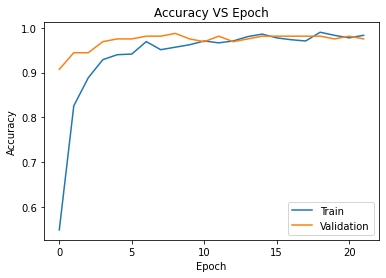

In [0]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

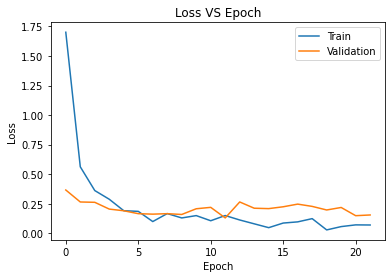

In [0]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Testing

Determine test set size

In [0]:
Test_Path='/content/drive/My Drive/Project/NewDataset/test'
Test_Size=0
for i in os.listdir(Test_Path):
  Test_Size+=len(os.listdir(Test_Path+'/'+i))
print(Test_Size)

19


Declare batch size

In [0]:
Batch_Size_Test=Test_Size

Determine steps per epoch

In [0]:
Steps_Per_Epoch_Test=Test_Size//Batch_Size_Test
Steps_Per_Epoch_Test

1

Testing

In [0]:
Test_Data=ImageDataGenerator(rescale=1/255).flow_from_directory(
    Test_Path,target_size=(128,128),batch_size=Batch_Size_Test,class_mode='categorical')

Found 19 images belonging to 11 classes.


In [0]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_009.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 1s 42ms/sample - loss: 3.4822e-07 - accuracy: 1.0000
Test Loss: 3.4821695749087667e-07
Test Accuracy: 1.0


### Save the model

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_009.save('Model 009.h5')

### Save metrics

In [0]:
with open('history 009.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [0]:
with open('Scores 009.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

## Results

In [0]:
os.chdir('/content/drive/My Drive/Transfer learning/')

In [0]:
with open('history 000.pkl','rb') as PICKLE_0:
  HISTORY_0=pickle.load(PICKLE_0)
with open('history 001.pkl','rb') as PICKLE_1:
  HISTORY_1=pickle.load(PICKLE_1)
with open('history 002.pkl','rb') as PICKLE_2:
  HISTORY_2=pickle.load(PICKLE_2)
with open('history 003.pkl','rb') as PICKLE_3:
  HISTORY_3=pickle.load(PICKLE_3)

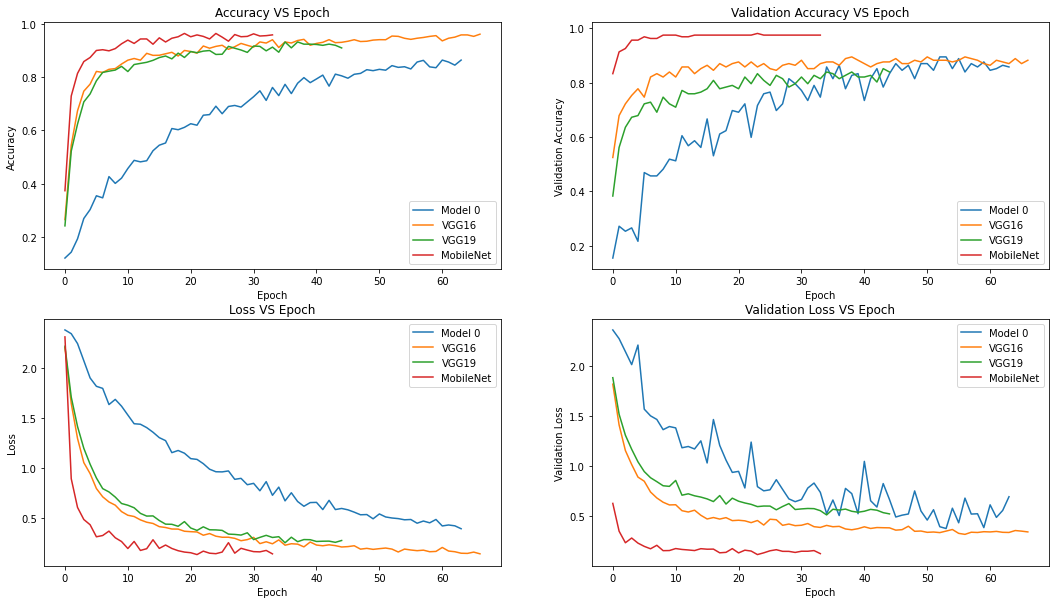

In [0]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(HISTORY_0['accuracy'])
plt.plot(HISTORY_1['accuracy'])
plt.plot(HISTORY_2['accuracy'])
plt.plot(HISTORY_3['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(HISTORY_0['val_accuracy'])
plt.plot(HISTORY_1['val_accuracy'])
plt.plot(HISTORY_2['val_accuracy'])
plt.plot(HISTORY_3['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='lower right')
plt.subplot(2,2,3)
plt.plot(HISTORY_0['loss'])
plt.plot(HISTORY_1['loss'])
plt.plot(HISTORY_2['loss'])
plt.plot(HISTORY_3['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.subplot(2,2,4)
plt.plot(HISTORY_0['val_loss'])
plt.plot(HISTORY_1['val_loss'])
plt.plot(HISTORY_2['val_loss'])
plt.plot(HISTORY_3['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.show()

In [0]:
with open('history 004.pkl','rb') as PICKLE_4:
  HISTORY_4=pickle.load(PICKLE_4)
with open('history 005.pkl','rb') as PICKLE_5:
  HISTORY_5=pickle.load(PICKLE_5)
with open('history 006.pkl','rb') as PICKLE_6:
  HISTORY_6=pickle.load(PICKLE_6)
with open('history 007.pkl','rb') as PICKLE_7:
  HISTORY_7=pickle.load(PICKLE_7)
with open('history 008.pkl','rb') as PICKLE_8:
  HISTORY_8=pickle.load(PICKLE_8)
with open('history 009.pkl','rb') as PICKLE_9:
  HISTORY_9=pickle.load(PICKLE_9)

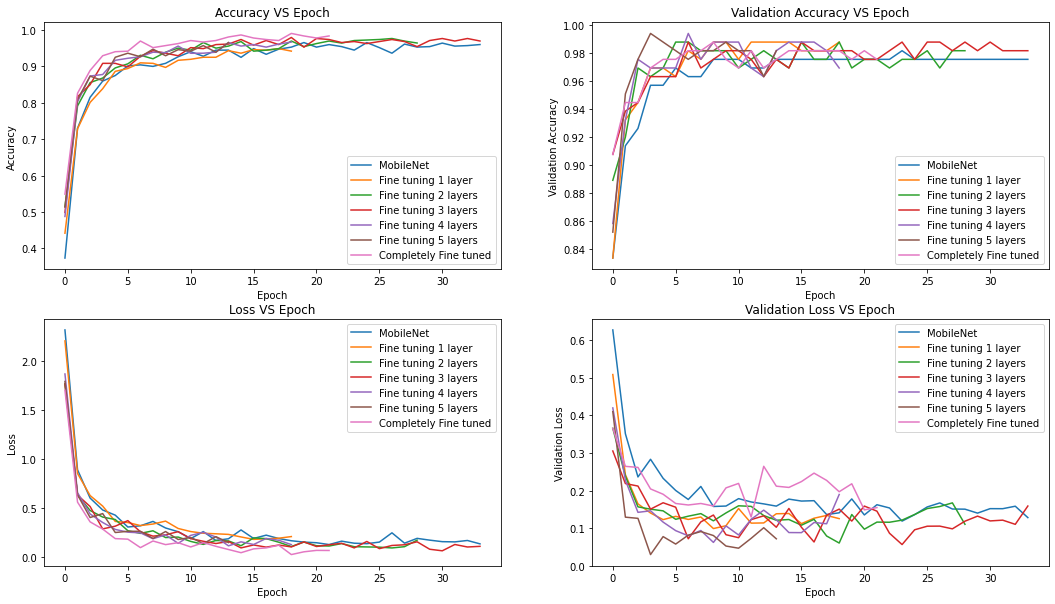

In [0]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(HISTORY_3['accuracy'])
plt.plot(HISTORY_4['accuracy'])
plt.plot(HISTORY_5['accuracy'])
plt.plot(HISTORY_6['accuracy'])
plt.plot(HISTORY_7['accuracy'])
plt.plot(HISTORY_8['accuracy'])
plt.plot(HISTORY_9['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(HISTORY_3['val_accuracy'])
plt.plot(HISTORY_4['val_accuracy'])
plt.plot(HISTORY_5['val_accuracy'])
plt.plot(HISTORY_6['val_accuracy'])
plt.plot(HISTORY_7['val_accuracy'])
plt.plot(HISTORY_8['val_accuracy'])
plt.plot(HISTORY_9['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.subplot(2,2,3)
plt.plot(HISTORY_3['loss'])
plt.plot(HISTORY_4['loss'])
plt.plot(HISTORY_5['loss'])
plt.plot(HISTORY_6['loss'])
plt.plot(HISTORY_7['loss'])
plt.plot(HISTORY_8['loss'])
plt.plot(HISTORY_9['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.subplot(2,2,4)
plt.plot(HISTORY_3['val_loss'])
plt.plot(HISTORY_4['val_loss'])
plt.plot(HISTORY_5['val_loss'])
plt.plot(HISTORY_6['val_loss'])
plt.plot(HISTORY_7['val_loss'])
plt.plot(HISTORY_8['val_loss'])
plt.plot(HISTORY_9['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

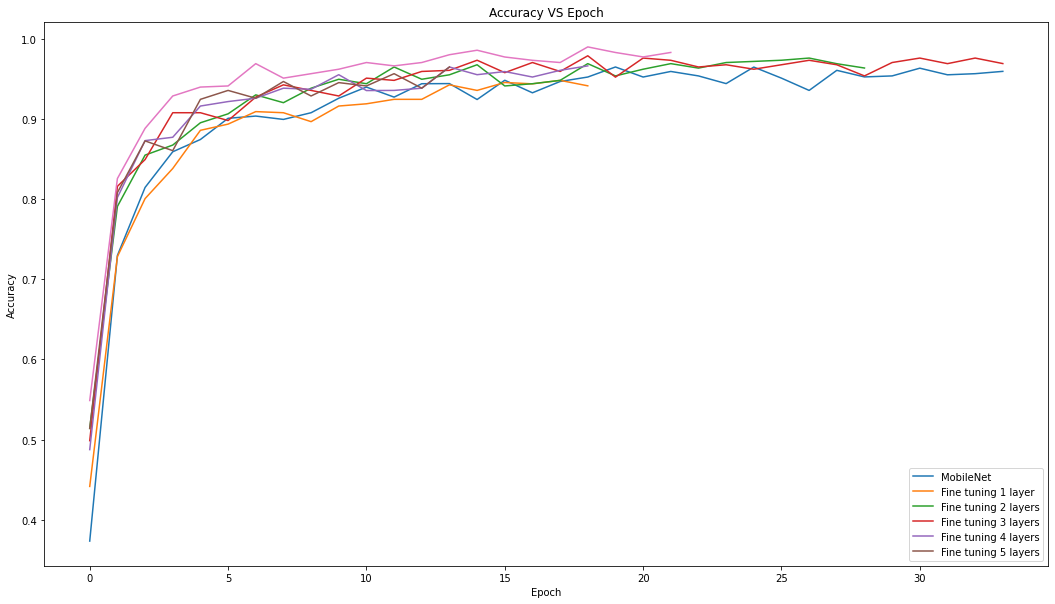

In [0]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['accuracy'])
plt.plot(HISTORY_4['accuracy'])
plt.plot(HISTORY_5['accuracy'])
plt.plot(HISTORY_6['accuracy'])
plt.plot(HISTORY_7['accuracy'])
plt.plot(HISTORY_8['accuracy'])
plt.plot(HISTORY_9['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers'], loc='lower right')
plt.show()

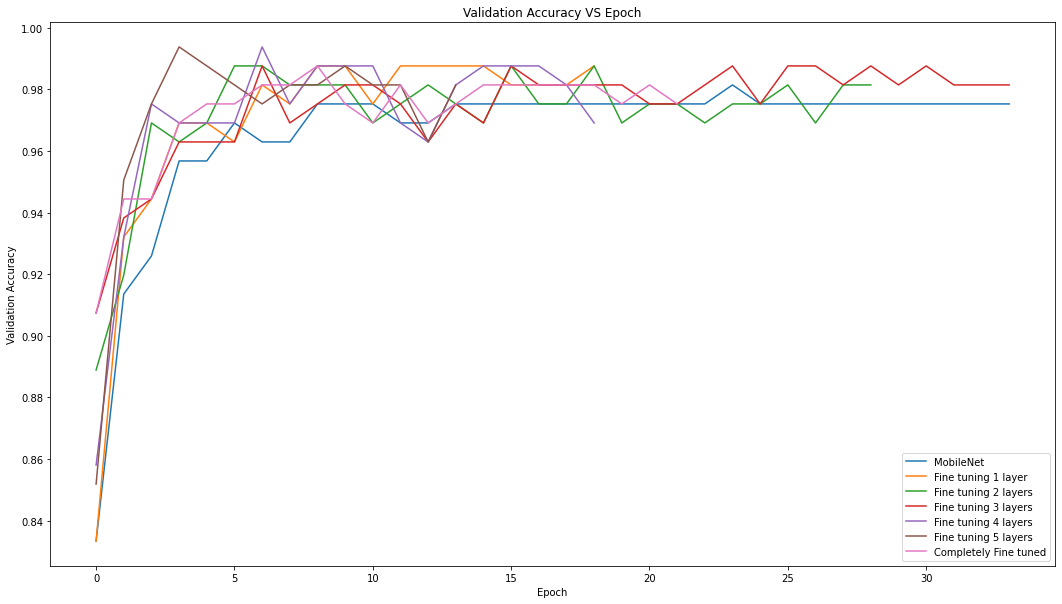

In [0]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['val_accuracy'])
plt.plot(HISTORY_4['val_accuracy'])
plt.plot(HISTORY_5['val_accuracy'])
plt.plot(HISTORY_6['val_accuracy'])
plt.plot(HISTORY_7['val_accuracy'])
plt.plot(HISTORY_8['val_accuracy'])
plt.plot(HISTORY_9['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.show()

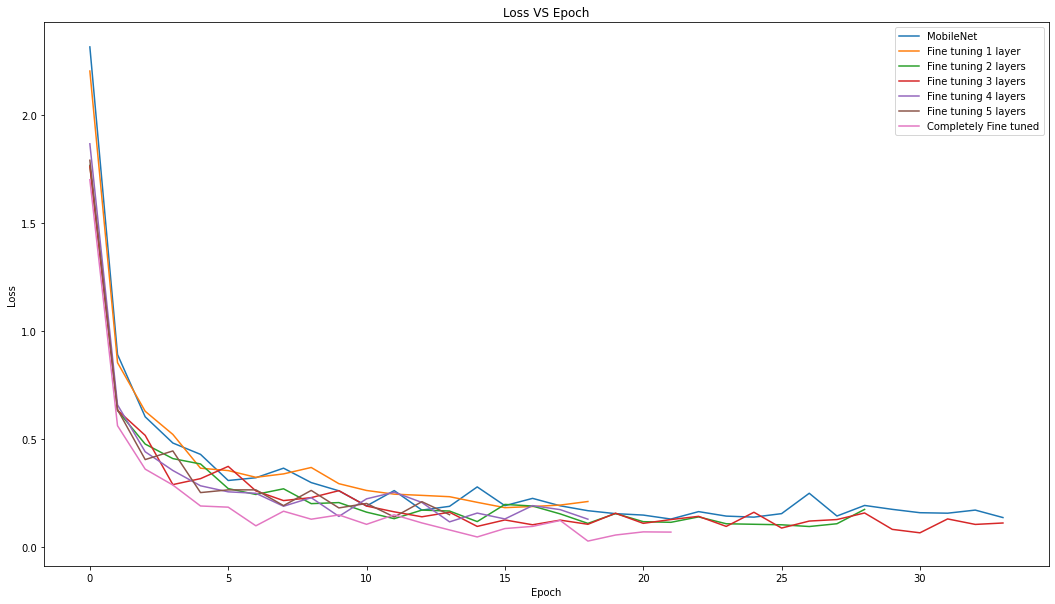

In [0]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['loss'])
plt.plot(HISTORY_4['loss'])
plt.plot(HISTORY_5['loss'])
plt.plot(HISTORY_6['loss'])
plt.plot(HISTORY_7['loss'])
plt.plot(HISTORY_8['loss'])
plt.plot(HISTORY_9['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

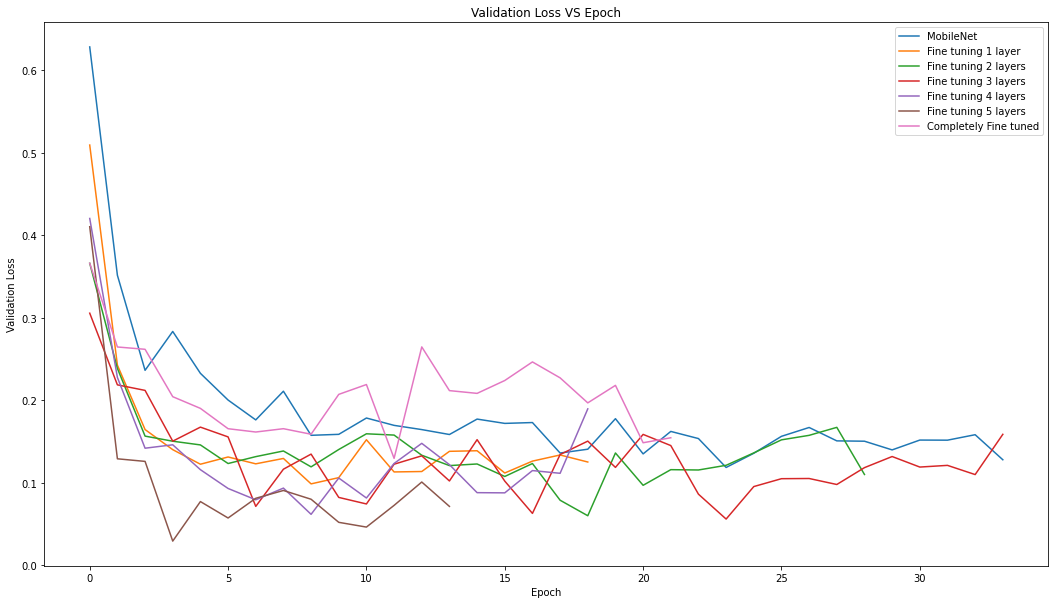

In [0]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['val_loss'])
plt.plot(HISTORY_4['val_loss'])
plt.plot(HISTORY_5['val_loss'])
plt.plot(HISTORY_6['val_loss'])
plt.plot(HISTORY_7['val_loss'])
plt.plot(HISTORY_8['val_loss'])
plt.plot(HISTORY_9['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

In [0]:
with open('Scores 000.pkl','rb') as PICKLE_0:
  SCORES_0=pickle.load(PICKLE_0)
with open('Scores 001.pkl','rb') as PICKLE_1:
  SCORES_1=pickle.load(PICKLE_1)
with open('Scores 002.pkl','rb') as PICKLE_2:
  SCORES_2=pickle.load(PICKLE_2)
with open('Scores 003.pkl','rb') as PICKLE_3:
  SCORES_3=pickle.load(PICKLE_3)
with open('Scores 004.pkl','rb') as PICKLE_4:
  SCORES_4=pickle.load(PICKLE_4)
with open('Scores 005.pkl','rb') as PICKLE_5:
  SCORES_5=pickle.load(PICKLE_5)
with open('Scores 006.pkl','rb') as PICKLE_6:
  SCORES_6=pickle.load(PICKLE_6)
with open('Scores 007.pkl','rb') as PICKLE_7:
  SCORES_7=pickle.load(PICKLE_7)
with open('Scores 008.pkl','rb') as PICKLE_8:
  SCORES_8=pickle.load(PICKLE_8)
with open('Scores 009.pkl','rb') as PICKLE_9:
  SCORES_9=pickle.load(PICKLE_9)

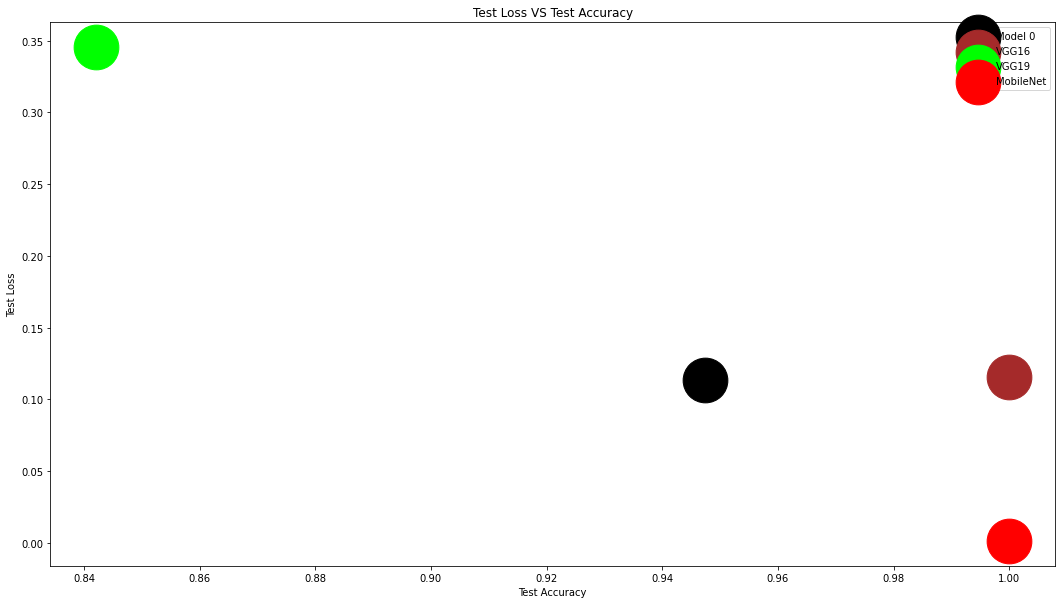

In [0]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_0[1],SCORES_0[0],s=2000,color='black')
plt.scatter(SCORES_1[1],SCORES_1[0],s=2000,color='brown')
plt.scatter(SCORES_2[1],SCORES_2[0],s=2000,color='lime')
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.show()

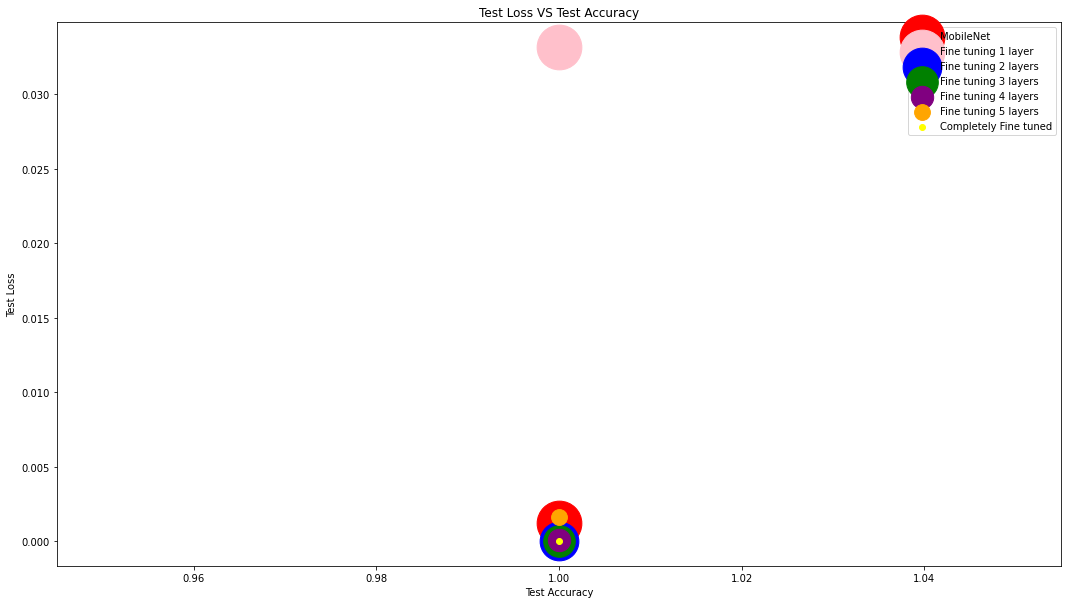

In [0]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.scatter(SCORES_4[1],SCORES_4[0],s=2000,color='pink')
plt.scatter(SCORES_5[1],SCORES_5[0],s=1500,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=1000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=500,color='purple')
plt.scatter(SCORES_8[1],SCORES_8[0],s=250,color='orange')
plt.scatter(SCORES_9[1],SCORES_9[0],color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

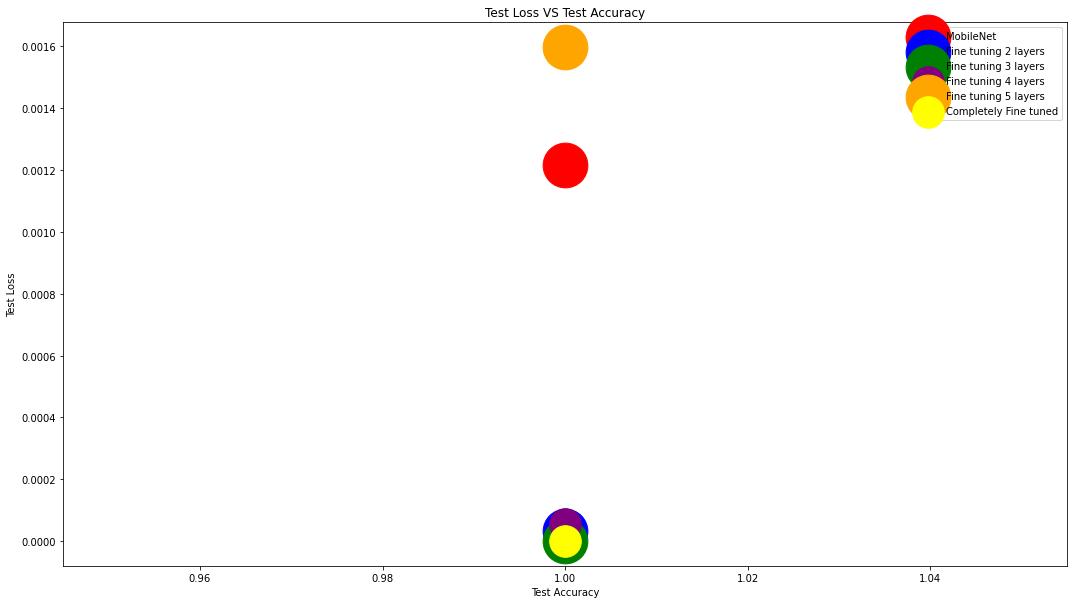

In [0]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.scatter(SCORES_5[1],SCORES_5[0],s=2000,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=1000,color='purple')
plt.scatter(SCORES_8[1],SCORES_8[0],s=2000,color='orange')
plt.scatter(SCORES_9[1],SCORES_9[0],s=1000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['MobileNet','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

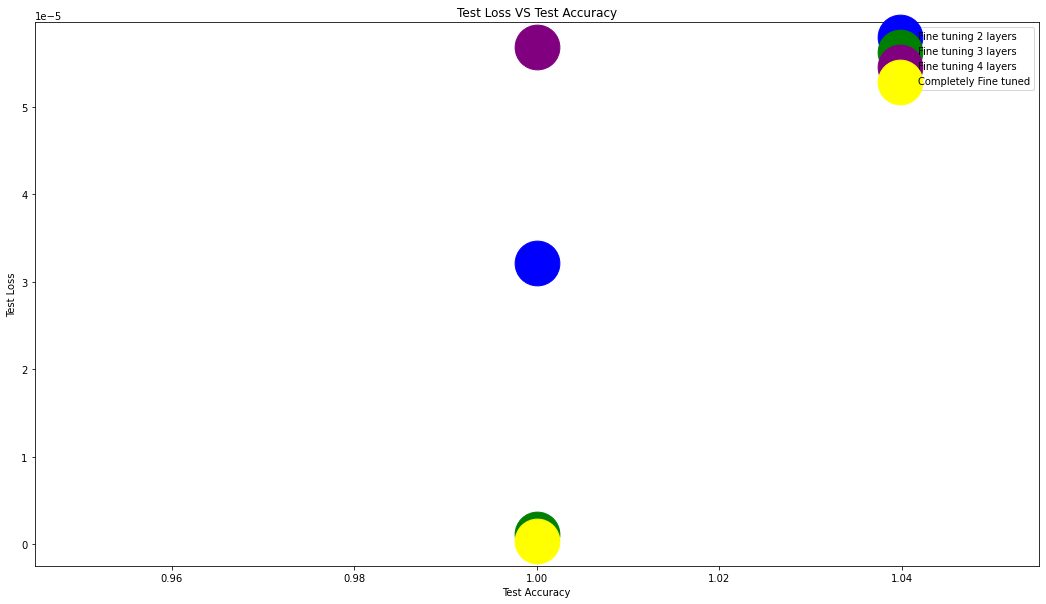

In [0]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_5[1],SCORES_5[0],s=2000,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=2000,color='purple')
plt.scatter(SCORES_9[1],SCORES_9[0],s=2000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Completely Fine tuned'], loc='upper right')
plt.show()

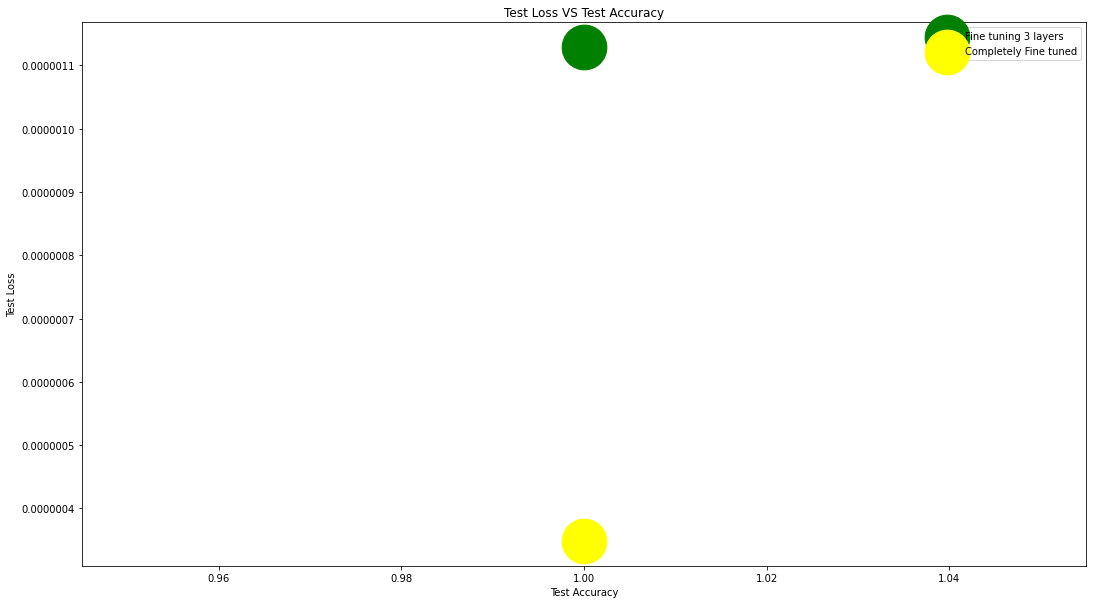

In [0]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_9[1],SCORES_9[0],s=2000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Fine tuning 3 layers','Completely Fine tuned'], loc='upper right')
plt.ticklabel_format(style='plain')#For better understanding of: 1e-6 on y-axis
plt.show()